In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import signal

In [84]:
df = pd.read_csv('prepared_data.csv')

In [85]:
df_coffee = df.loc[df['Product']=='Coffee',['Date','Quantity']].reset_index(drop=True)
df_tea = df.loc[df['Product']=='Tea',['Date','Quantity']].reset_index(drop=True)

## Functions

In [ ]:
def time_lag(df, lagged_qty, steps = 1, season = None):

    for step in range(steps):
        df[f't-{step+1}'] = df[lagged_qty].shift(step+1)
    
    if season != None:

        df[f'S({season})'] = df[lagged_qty].shift(season)
    

In [ ]:
def seasonal_breakdown():
    return 1

## Coffee

In [ ]:
time_lag(df_coffee,'Quantity',steps = 3)

In [90]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      181 non-null    object 
 1   Quantity  181 non-null    int64  
 2   t-1       180 non-null    float64
 3   t-2       179 non-null    float64
 4   t-3       178 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.2+ KB


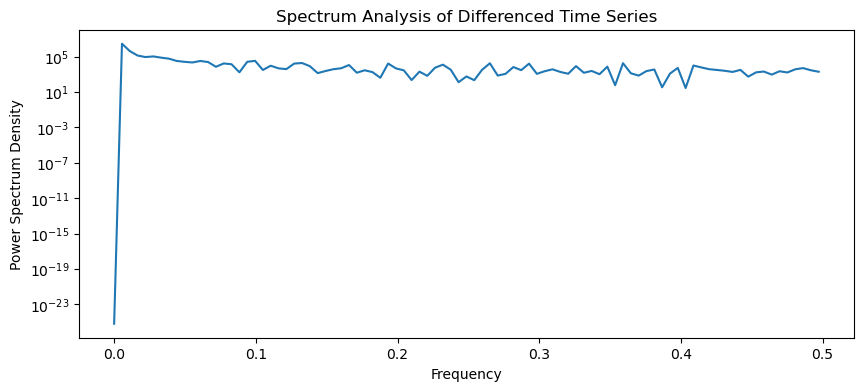

In [93]:
f, Pxx = signal.periodogram(df_coffee['Quantity'])

fig, ax = plt.subplots(figsize=(10,4))

ax.semilogy(f,Pxx)
ax.set(title = 'Spectrum Analysis of Differenced Time Series',
       xlabel = 'Frequency',
       ylabel = 'Power Spectrum Density')
#ax.set_ylim([1e-4,1e1])
plt.show()